In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd

## all cell types

In [2]:
adata = sc.read_h5ad("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/prater/Prater_Green_PU1_All_Celltypes_17clusters_DeID.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 190970 × 30706
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Pt_ID', 'Study_Designation', 'CognitiveStatus', 'Sex', 'APOE', 'PMI', 'BrainPh', 'Race', 'FreshBrainWeight', 'NIA_AA', 'ThalPhase', 'BraakStage', 'CERAD', 'LATEScore', 'SeqBatch', 'Dub_scores', 'percent.mito', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.2', 'seurat_clusters', 'coded_Age'
    var: '_index', 'features'

In [4]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.pp.pca(adata, mask_var="highly_variable")
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/home/icb/zihe.zheng/miniconda3/envs/scanpy2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
adata.obs = adata.obs.astype(str)

In [ ]:
# patient 3 and 9 have microglia cells that are seperated
# sc.pl.umap(adata[adata.obs.seurat_clusters.isin(['0', '1', '2', '6', '15', '16'])], color = ['Pt_ID'])

In [7]:
# sc.pl.umap(adata[adata.obs.seurat_clusters.isin(['0', '1', '2', '6', '15', '16'])], color = ['Pt_ID'], groups = ['3'])

In [8]:
# microglia cells
# sc.pl.umap(adata[adata.obs.seurat_clusters.isin(['0', '1', '2', '6', '15', '16'])], color = ['Pt_ID', 'Study_Designation', 'CognitiveStatus', 'Sex', 'APOE', 'PMI', 'BrainPh', 'Race', 'FreshBrainWeight', 'NIA_AA', 'ThalPhase', 'BraakStage', 'CERAD', 'LATEScore', 'SeqBatch', 'integrated_snn_res.0.2', 'seurat_clusters', 'coded_Age'])

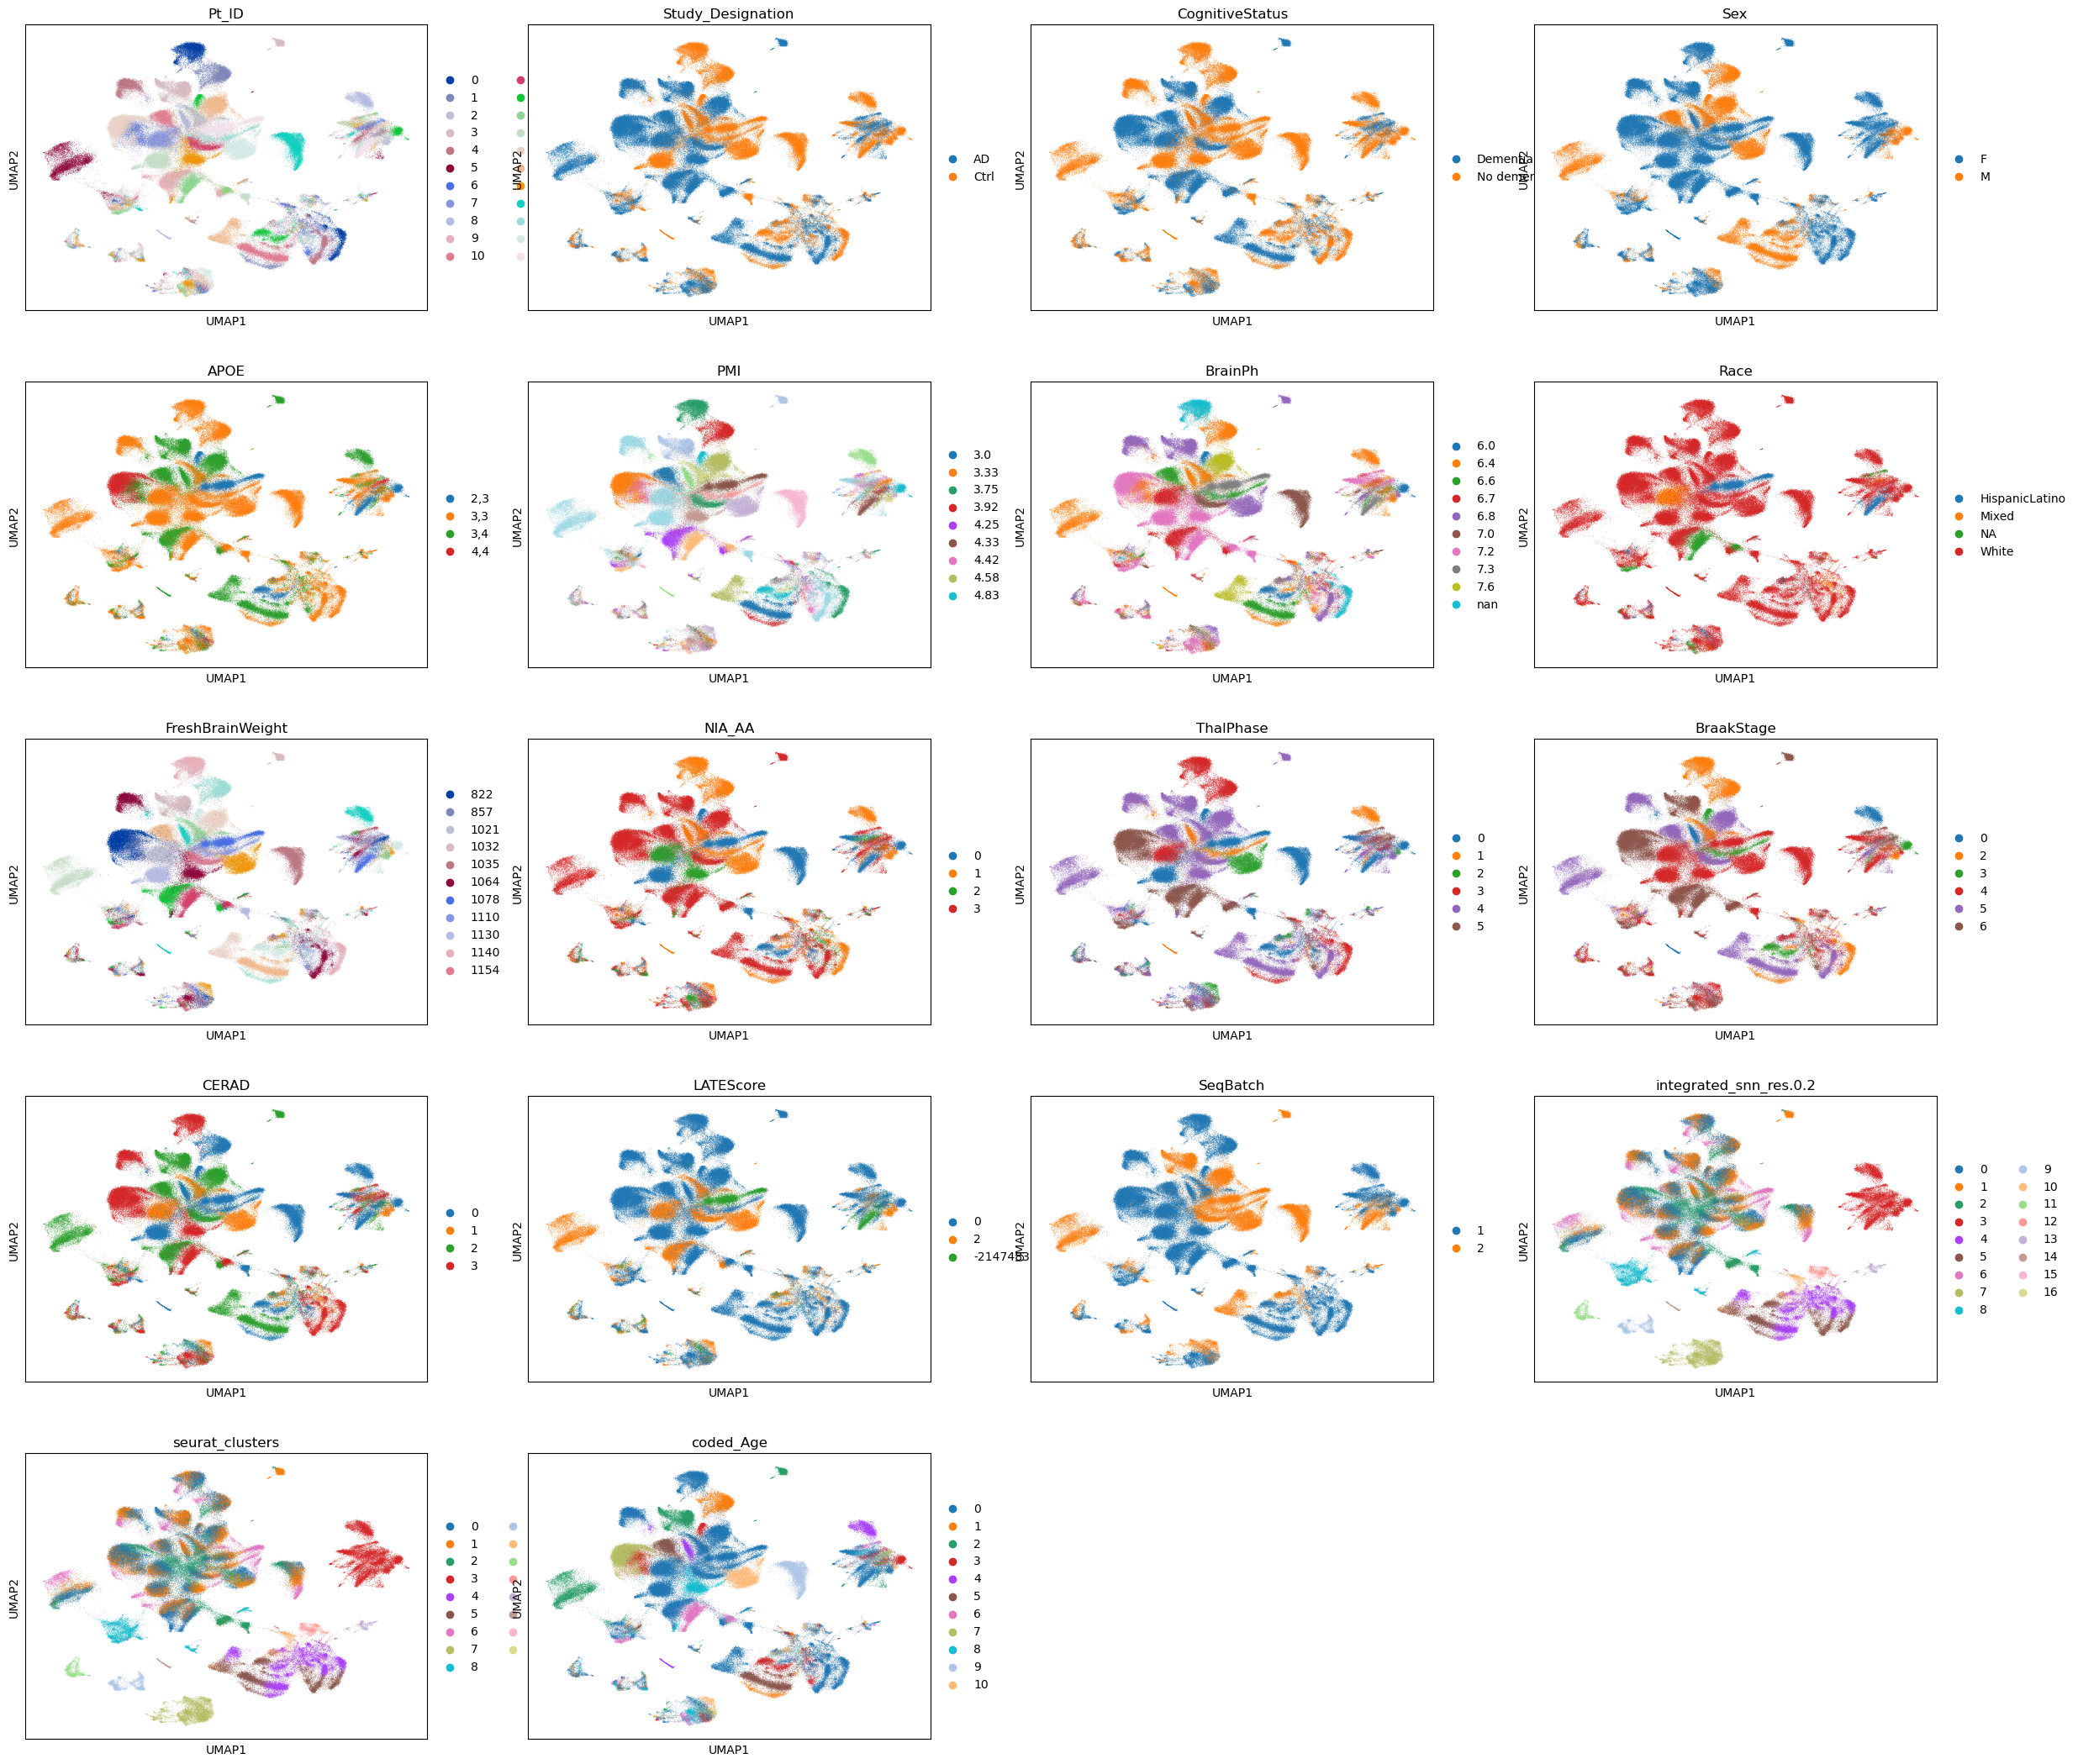

In [9]:
sc.pl.umap(adata, color = ['Pt_ID', 'Study_Designation', 'CognitiveStatus', 'Sex', 'APOE', 'PMI', 'BrainPh', 'Race', 'FreshBrainWeight', 'NIA_AA', 'ThalPhase', 'BraakStage', 'CERAD', 'LATEScore', 'SeqBatch', 'integrated_snn_res.0.2', 'seurat_clusters', 'coded_Age'])

In [13]:
adata.var_names = adata.var.features
adata.var = adata.var.drop(columns = (['_index']))
adata.var.index.name = None
adata.raw = None

In [20]:
adata.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/prater/all_celltypes_processed.h5ad')

## Microglia cells 

In [24]:
adata = sc.read_h5ad("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/prater/Prater_Green_PU1_MGsubset_10clusters_DeID.h5ad")

In [30]:
adata.layers['counts'] = adata.raw.X

In [34]:
# sc.pp.normalize_total(adata)
# sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.pp.pca(adata, mask_var="highly_variable")
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [41]:
adata.layers['counts'].data

array([1., 0., 1., ..., 0., 1., 1.])

In [36]:
adata

AnnData object with n_obs × n_vars = 127367 × 30706
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Pt_ID', 'Study_Designation', 'CognitiveStatus', 'Sex', 'APOE', 'PMI', 'BrainPh', 'Race', 'FreshBrainWeight', 'NIA_AA', 'ThalPhase', 'BraakStage', 'CERAD', 'LATEScore', 'SeqBatch', 'Dub_scores', 'percent.mito', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.3', 'seurat_clusters', 'coded_Age'
    var: '_index', 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [37]:
adata.obs[['APOE', 'Pt_ID', 'NIA_AA', 'ThalPhase', 'BraakStage', 'CERAD', 'SeqBatch', 'integrated_snn_res.0.3', 'seurat_clusters', 'coded_Age']] = adata.obs[['APOE', 'Pt_ID', 'NIA_AA', 'ThalPhase', 'BraakStage', 'CERAD', 'SeqBatch', 'integrated_snn_res.0.3', 'seurat_clusters', 'coded_Age']].astype(str)

/home/icb/zihe.zheng/miniconda3/envs/scanpy2/lib/python3.9/site-packages/matplotlib/colors.py:1370: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


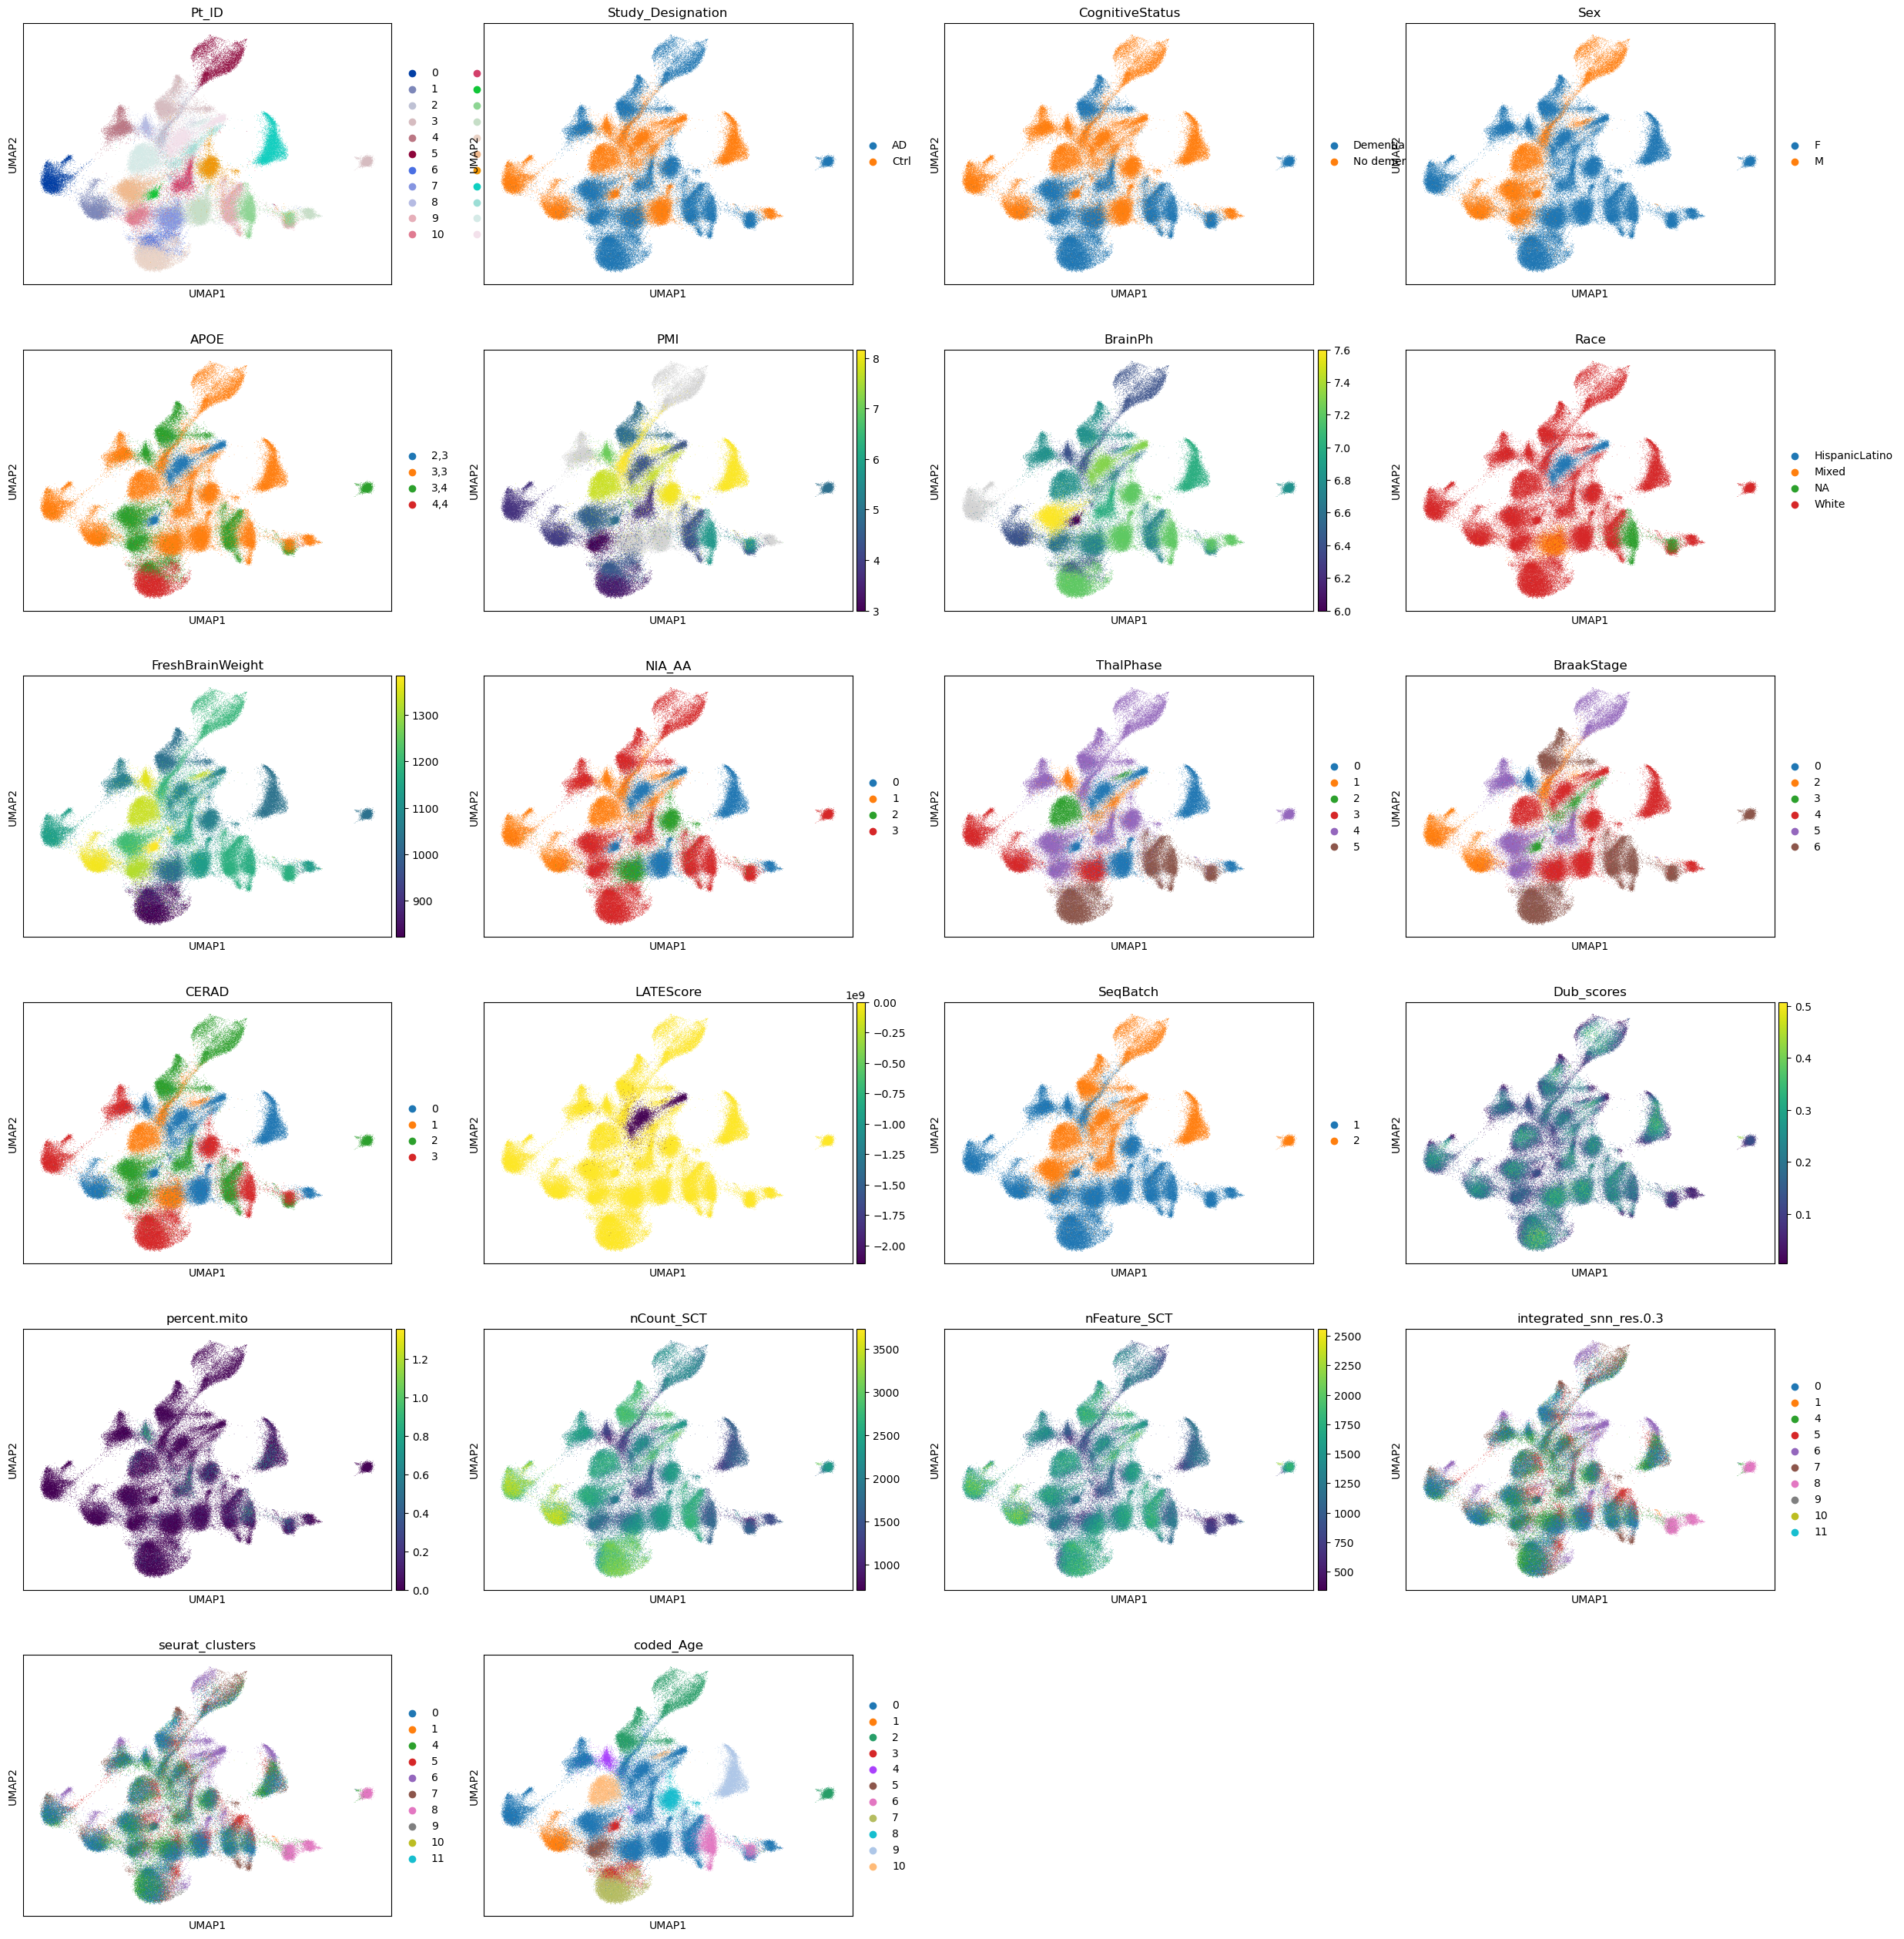

In [38]:
sc.pl.umap(adata, color = ['Pt_ID', 'Study_Designation', 'CognitiveStatus', 'Sex', 'APOE', 'PMI', 'BrainPh', 'Race', 'FreshBrainWeight', 'NIA_AA', 'ThalPhase', 'BraakStage', 'CERAD', 'LATEScore', 'SeqBatch', 'Dub_scores', 'percent.mito', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.3', 'seurat_clusters', 'coded_Age'])

In [39]:
adata.var_names = adata.var.features
adata.var = adata.var.drop(columns = (['_index']))
adata.var.index.name = None
adata.raw = None

In [40]:
adata.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/prater/microglia_processed.h5ad')

In [2]:
# process for multimil integration with seaad and sun
rna_prater = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/prater/microglia_processed.h5ad')

In [4]:
sc.pp.highly_variable_genes(rna_prater, n_top_genes=2000, subset=True)

In [5]:
rna_prater.X = rna_prater.layers['counts']

In [12]:
rna_prater.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/prater/microglia_processed_hvg.h5ad')

In [6]:
rna_prater.layers['counts']

<127367x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 11277063 stored elements in Compressed Sparse Row format>

In [10]:
rna_prater.X.data

array([0., 2., 1., ..., 1., 1., 0.])

In [9]:
8767-7000

1767

## integrated

In [3]:
adata = sc.read_h5ad('/home/icb/zihe.zheng/projects/microglia/data/integrated_prater.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 127367 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Pt_ID', 'Study_Designation', 'CognitiveStatus', 'Sex', 'APOE', 'PMI', 'BrainPh', 'Race', 'FreshBrainWeight', 'NIA_AA', 'ThalPhase', 'BraakStage', 'CERAD', 'LATEScore', 'SeqBatch', 'Dub_scores', 'percent.mito', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.3', 'seurat_clusters', 'coded_Age', 'group', '_scvi_batch', 'APOE_rename'
    var: 'modality'
    uns: 'APOE_rename_colors', 'BraakStage_colors', 'CERAD_colors', 'CognitiveStatus_colors', 'NIA_AA_colors', 'Pt_ID_colors', 'Race_colors', 'SeqBatch_colors', 'Sex_colors', 'Study_Designation_colors', 'ThalPhase_colors', '_scvi_manager_uuid', '_scvi_uuid', 'coded_Age_colors', 'integrated_snn_res.0.3_colors', 'modality_lengths', 'neighbors', 'seurat_clusters_colors', 'umap'
    obsm: 'X_multiMIL', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
rna_mtg = sc.read_h5ad('/home/icb/zihe.zheng/projects/microglia/data/SEAAD/reduced_microglia_SEAAD_MTG_RNAseq.h5ad')

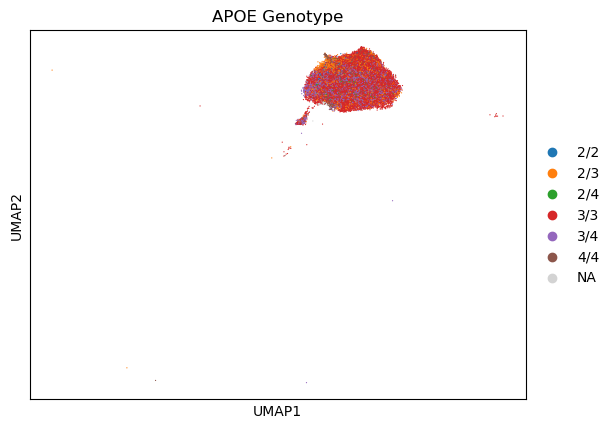

In [8]:
sc.pl.umap(rna_mtg, color = ['APOE Genotype'])